<a href="https://colab.research.google.com/github/saharCoder/DataAnalysis/blob/main/STC_TV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Loading and Reading the dataset

In [ ]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataset=pd.read_excel('/content/gdrive/MyDrive/stc TV Data Set_T1.xlsb')

In [ ]:
#Viewing the data
dataset.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
#checking the columns in the dataset
dataset.columns

Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

##Dataset Features/Columns
1. 'Column1'
2. 'date_'
3. 'user_id_maped'
4. 'program_name'
5. 'duration_seconds'
6. 'program_class'
7. 'season'
8. 'episode'
9. 'program_desc'
10. 'program_genre'
11. 'series_title'
12. 'hd'
13. 'original_name'

In [ ]:
#we can notice that the column1 is only the index of the rows in the file, we can just drop it
dataset=dataset.drop('Column1',axis=1)

In [ ]:
dataset

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,42847,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial
1048571,43068,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends
1048572,42901,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror
1048573,42989,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear


In [ ]:
dataset.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')


2. 'date_'
3. 'user_id_maped': The id of the user in STC Tv
4. 'program_name': The name of wheather the series or the movie
5. 'duration_seconds'
6. 'program_class': Type of the program Movie or Series
7. 'season': 0 if the program is a movie, and the number of season for the series program
8. 'episode': number of eposides in series program
9. 'program_desc'
10. 'program_genre': type of the program
11. 'series_title'
12. 'hd': SD==0 or HD==1?
13. 'original_name'

In [ ]:
#print a sample of the dataset:
sample=dataset.sample(n=5)

In [ ]:
sample

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
608386,42877,33741,The White Queen Long Live The King,4052,SERIES/EPISODES,1,8,Drama MovieLong Live The King (HD),Drama,0,1,The White Queen
181580,42918,12266,Slugterra Inheritance,1273,SERIES/EPISODES,1,17,Animation MovieInheritance (HD),Animation,0,0,Slugterra
938989,43114,23496,Spider-Man: Homecoming,100,MOVIE,0,0,Action MovieSpider-Man: Homecoming (HD),Action,0,1,Spider-Man: Homecoming
778872,42890,8781,Finding Forrester,46,MOVIE,0,0,Drama MovieFinding Forrester (HD),Drama,0,1,Finding Forrester
472136,42918,23825,The BFG,120,MOVIE,0,0,Family MovieThe BFG (HD),Family,0,1,The BFG


In [ ]:
#Checking the size and number of records we have in the dataset
dataset.shape

(1048575, 12)

##We have **1048575** records in the dataset with **12** coulmns

In [ ]:
#We can check the data type in the columns: Numerical or Catogrical 
dataset.dtypes

date_                int64
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_desc        object
program_genre       object
series_title         int64
hd                   int64
original_name       object
dtype: object

#this does not give the real info because int type in hd is not the number but a flag that indicate the type of res


##Numerical datatype:
- date
- duration
- season
- eps


#Data Wrangling

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date_             1048575 non-null  int64 
 1   user_id_maped     1048575 non-null  int64 
 2   program_name      1048575 non-null  object
 3   duration_seconds  1048575 non-null  int64 
 4   program_class     1048575 non-null  object
 5   season            1048575 non-null  int64 
 6   episode           1048575 non-null  int64 
 7   program_desc      1034537 non-null  object
 8   program_genre     1048575 non-null  object
 9   series_title      1048575 non-null  int64 
 10  hd                1048575 non-null  int64 
 11  original_name     1048575 non-null  object
dtypes: int64(7), object(5)
memory usage: 96.0+ MB


In [ ]:
#from the upove information we can see that there are some null values in some of the columns that we need to deal with it
#Another way to check missing value across the columns
[features for features in dataset.columns if dataset[features].isnull().sum()>0]

['program_desc']

In [ ]:
dataset['program_desc']

0                                     Drama Movie100 Streets
1                                  Animation MovieMoana (HD)
2                   Animation MovieThe Mermaid Princess (HD)
3                   Animation MovieThe Mermaid Princess (HD)
4                              Biography MovieChurchill (HD)
                                 ...                        
1048570                    Horror MovieExtraterrestrial (HD)
1048571    Comedy MovieThe One With The Holiday Armadillo...
1048572                Horror MovieDreams In The Witch House
1048573                Drama MovieTwo Lovers and a Bear (HD)
1048574                      Drama MovieAmerican Psycho (HD)
Name: program_desc, Length: 1048575, dtype: object

In [ ]:
#the program_desc columns contain unimportant info which is a duplicate of other columns int the dataset
dataset=dataset.drop('program_desc',axis=1)

In [ ]:
dataset.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_genre', 'series_title',
       'hd', 'original_name'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date_             1048575 non-null  int64 
 1   user_id_maped     1048575 non-null  int64 
 2   program_name      1048575 non-null  object
 3   duration_seconds  1048575 non-null  int64 
 4   program_class     1048575 non-null  object
 5   season            1048575 non-null  int64 
 6   episode           1048575 non-null  int64 
 7   program_genre     1048575 non-null  object
 8   series_title      1048575 non-null  int64 
 9   hd                1048575 non-null  int64 
 10  original_name     1048575 non-null  object
dtypes: int64(7), object(4)
memory usage: 88.0+ MB


In [ ]:
#Rechecking null values after dropping the desc columns
[features for features in dataset.columns if dataset[features].isnull().sum()>0]

[]

In [ ]:
#Good!! we do not have any more null values in the dataset so we can go ahead and check duplicated values since we have the id columns
dataset.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [ ]:
duplicate=dataset.duplicated().sum()

In [ ]:
duplicate

102383

In [ ]:
#Not duplicated records:
dataset.shape[0]-duplicate

946192

In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(946192, 11)

In [ ]:
#Number of unique data in the columns
dataset.nunique()

date_                 411
user_id_maped       11578
program_name         8270
duration_seconds    18958
program_class           2
season                 22
episode               281
program_genre          16
series_title            2
hd                      2
original_name        1795
dtype: int64

#Analyzing the data columns 

##user id

In [ ]:
#check duplicate user id
dataset['user_id_maped'].duplicated().sum()

934614

In [ ]:
dataset['user_id_maped'].value_counts()

33381    2152
15538    2151
730      2150
16150    2143
19000    2109
         ... 
28887       1
32254       1
12737       1
14039       1
1820        1
Name: user_id_maped, Length: 11578, dtype: int64

In [ ]:
dataset['user_id_maped'].value_counts().values.max()

2152

In [ ]:
dataset['user_id_maped'].value_counts().values.min()

1

In [ ]:
#to know the number of users in the dataset
len(dataset['user_id_maped'].value_counts().index)

11578

#### So in the dataset we have 11578 uniques users id

## program_name

In [ ]:
dataset['program_name'].value_counts()

Pingu                                               16352
The Boss Baby                                       14735
Trolls                                               8979
Oscar's Oasis                                        7107
Moana                                                6075
                                                    ...  
Pinky Dinky Doo      Tyler's Big Idea                   1
Pinky Dinky Doo      Dragon Needs a ippy Cup            1
Thomas And Friends  eason2   Percy's Predicament        1
Wild Animal Baby Explorers     eeing now Prints         1
Pinky Dinky Doo      Tyler's illy hirt                  1
Name: program_name, Length: 8270, dtype: int64

In [ ]:
index=dataset['program_name'].value_counts().index
val=dataset['program_name'].value_counts().values

In [ ]:
#we can view the most viewed program by checking the number of occurance in the dataset accross records
#get the number of unique programs in the data
len(dataset['program_name'].value_counts().index)

8270

In [ ]:
# selecting rows based on condition
rslt_df = dataset.loc[dataset['program_name'] == 'The Boss Baby']
  
rslt_df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,series_title,hd,original_name
2974,43122,30807,The Boss Baby,90,MOVIE,0,0,Animation,0,0,The Boss Baby
3283,42987,5954,The Boss Baby,46,MOVIE,0,0,Animation,0,0,The Boss Baby
4624,43119,14987,The Boss Baby,4904,MOVIE,0,0,Animation,0,0,The Boss Baby
4712,43030,27896,The Boss Baby,118,MOVIE,0,0,Animation,0,0,The Boss Baby
7202,42968,8560,The Boss Baby,89,MOVIE,0,0,Animation,0,0,The Boss Baby
...,...,...,...,...,...,...,...,...,...,...,...
1029527,43049,1027,The Boss Baby,7106,MOVIE,0,0,Animation,0,0,The Boss Baby
1031119,43066,653,The Boss Baby,2,MOVIE,0,0,Animation,0,0,The Boss Baby
1032743,42961,33399,The Boss Baby,6047,MOVIE,0,0,Animation,0,0,The Boss Baby
1043767,43058,5164,The Boss Baby,91,MOVIE,0,0,Animation,0,0,The Boss Baby


In [ ]:
charac=np.array(dataset[dataset['program_name']=='The Boss Baby']['program_genre'].unique())

In [ ]:
c=np.array(dataset[dataset['program_name']=='The Boss Baby']['program_class'].unique())
charac=np.append(charac,c)

In [ ]:
h=np.array(dataset[dataset['program_name']=='The Boss Baby']['hd'].unique())
charac=np.append(charac,h)

In [ ]:
charac

array(['Animation', 'MOVIE', 0], dtype=object)

In [ ]:
dataset[dataset['program_name']=='Pingu']['program_genre'].unique()

array([], dtype=object)

In [ ]:
dataset[dataset['program_name']=='Pinky Dinky Doo']['program_genre'].unique()

array([], dtype=object)

##Program Class

In [ ]:
dataset['program_class'].unique()

array(['MOVIE', 'SERIES/EPISODES'], dtype=object)

####There are only 2 type of program class: Movie & Series

In [ ]:
dataset['program_class'].value_counts()

SERIES/EPISODES    553980
MOVIE              392212
Name: program_class, dtype: int64

In [ ]:
ind=dataset['program_class'].value_counts().index
value=dataset['program_class'].value_counts().values

In [ ]:
import seaborn as sns

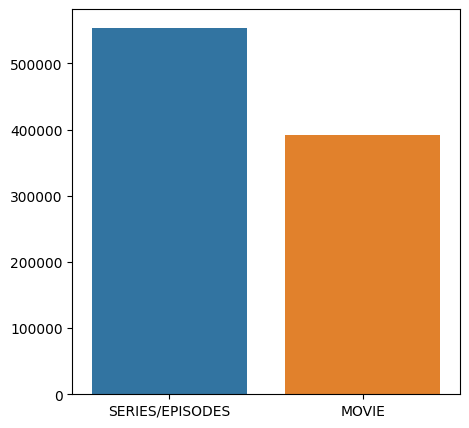

In [ ]:
sns.barplot(x = ind,
            y = value,
            data = dataset)
 
# Show the plot
plt.show()

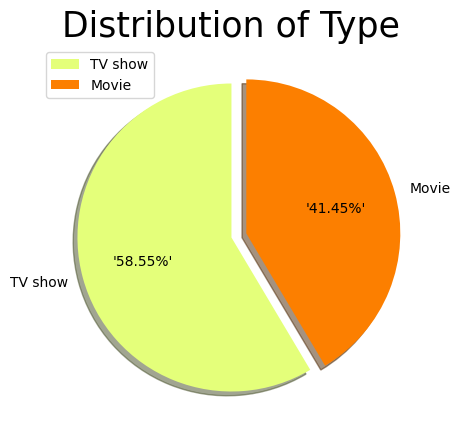

In [ ]:
labels = ['TV show', 'Movie']
size = dataset['program_class'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90,autopct="'%1.2f%%'")
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

#season

In [ ]:
#0 in season mean that is a movie not a series

In [ ]:
s=list(dataset['season'].unique())

In [ ]:
s.remove(0)

In [ ]:
s

[2, 1, 3, 7, 6, 4, 8, 9, 10, 5, 20, 22, 19, 18, 11, 21, 13, 23, 12, 15, 14]

In [ ]:
#Does 0 season mean a movie
dataset['season'].value_counts()

0     392287
1     314300
2      56446
3      47176
7      37713
4      33599
5      24729
6      21317
8      10336
9       3969
10      2454
12       669
11       296
21       170
22       167
18       139
19       128
23        93
13        90
20        86
15        24
14         4
Name: season, dtype: int64

In [ ]:
inn=list(dataset['season'].value_counts().index)
vv=list(dataset['season'].value_counts().values)

In [ ]:
inn.remove(0)

In [ ]:
vv.pop(0)

392287

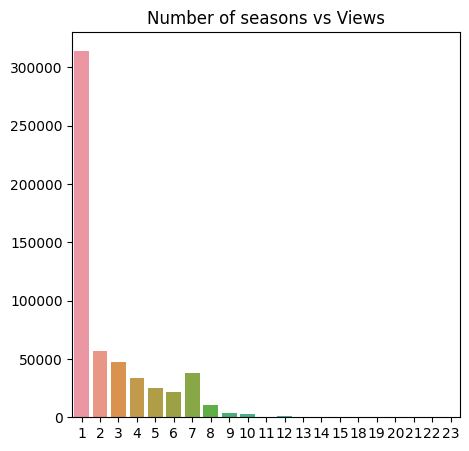

In [ ]:
sns.barplot(x = inn,
            y = vv,
            data = dataset).set(title='Number of seasons vs Views')
 
# Show the plot
plt.show()

####So from the graph we see that most users watch series with 1 season

#episode

In [ ]:
s=list(dataset['episode'].unique())

In [ ]:
s.remove(0)

In [ ]:
#The max number of eposiod
print('The max number of eposiod: ',max(s))

The max number of eposiod:  282


In [ ]:
print('The min number of eposiod: ',min(s))

The min number of eposiod:  1


In [ ]:
#what is the seris with a 1 eposide
ep=dataset[dataset['episode']==1]

In [ ]:
ep['program_name'].unique()

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
#Average number of eposide
print('The Average number of eposide: ',Average(s))

The Average number of eposide:  140.97142857142856


In [ ]:
#Most viewd vs eps
dataset['episode'].value_counts()

0      403885
1       66349
2       36138
3       31475
4       29448
        ...  
262         6
269         6
272         5
267         5
116         1
Name: episode, Length: 281, dtype: int64

####This show that only one record is in the dataset who watch a series with a 116 eps

In [ ]:
dataset=dataset.drop('series_title',axis=1)

In [ ]:
dataset.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_genre', 'hd',
       'original_name'],
      dtype='object')

#Program Genere

In [ ]:
dataset['program_genre'].value_counts()

Animation                           358203
Action                              161860
Drama                               142117
Comedy                              124800
Horror                               68911
Thriller                             37650
Family                               25885
Biography                            11272
Documentary                           8450
Crime                                 2757
NOT_DEFINED_IN_UMS                    2008
Sci-Fi                                1319
Romance                                511
Adventure                              225
SERIES_NOT_ADDED_UNDER_ANY_GENRE       216
Wrestling                                8
Name: program_genre, dtype: int64

In [ ]:
print('There are ',len(dataset['program_genre'].value_counts().index),' Generes in the dataset')

There are  16  Generes in the dataset


In [ ]:
gin=dataset['program_genre'].value_counts().index
gv=dataset['program_genre'].value_counts().values

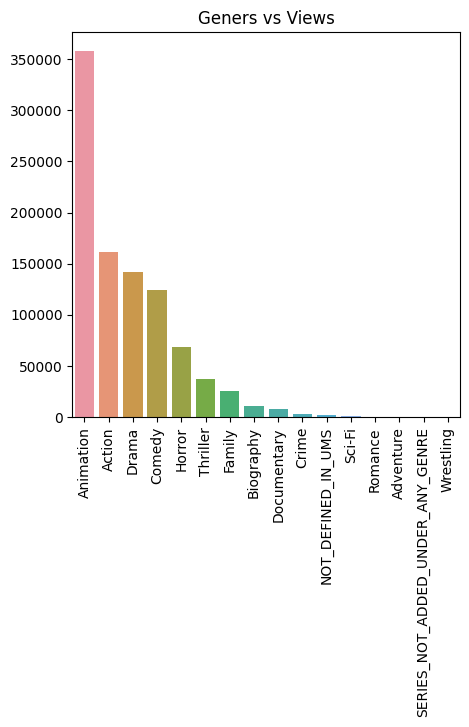

In [ ]:
sns.barplot(x = gin,
            y = gv,
            data = dataset).set(title='Geners vs Views')
 
# Show the plot
plt.xticks(rotation = 90)
plt.show()

####Most of the records is Animation genere

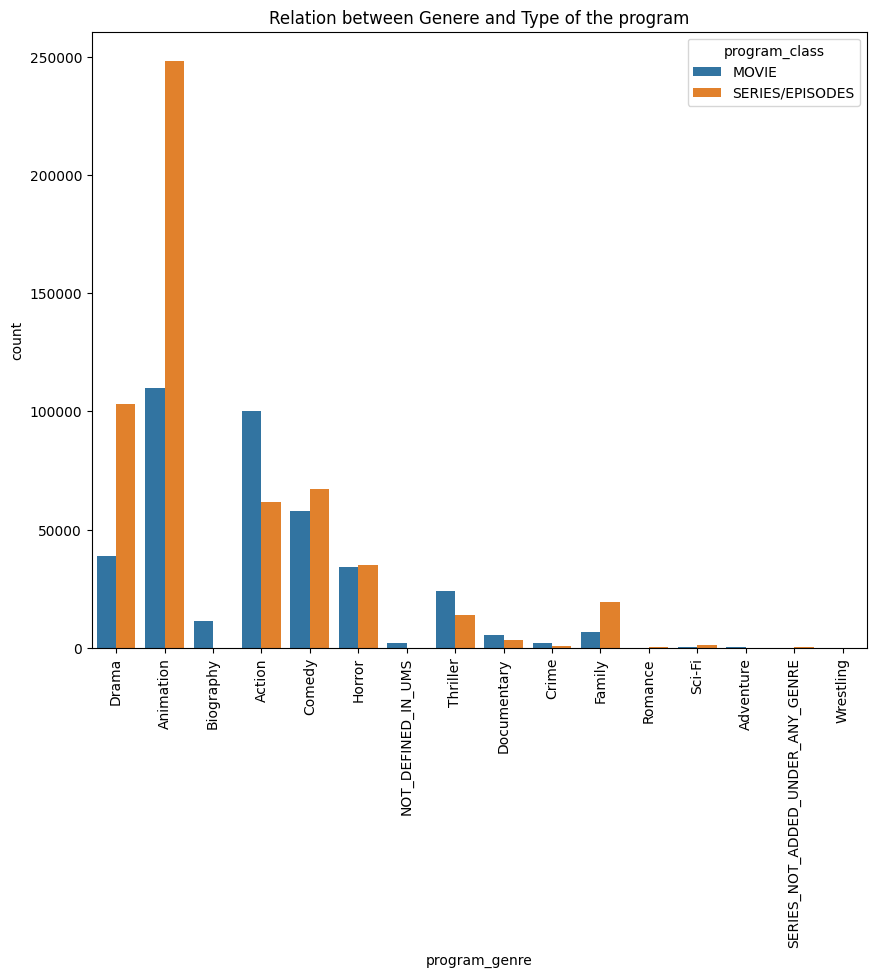

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='program_genre',hue='program_class',data=dataset)
plt.title('Relation between Genere and Type of the program')
plt.xticks(rotation = 90)
plt.show()

###Insight from the graph:
- Animation movies and series is so popular in STC TV
- Most user watch a drama series
- Most of biology genere is in movie programs
- Horror genere is almost equal

In [ ]:
from wordcloud import WordCloud

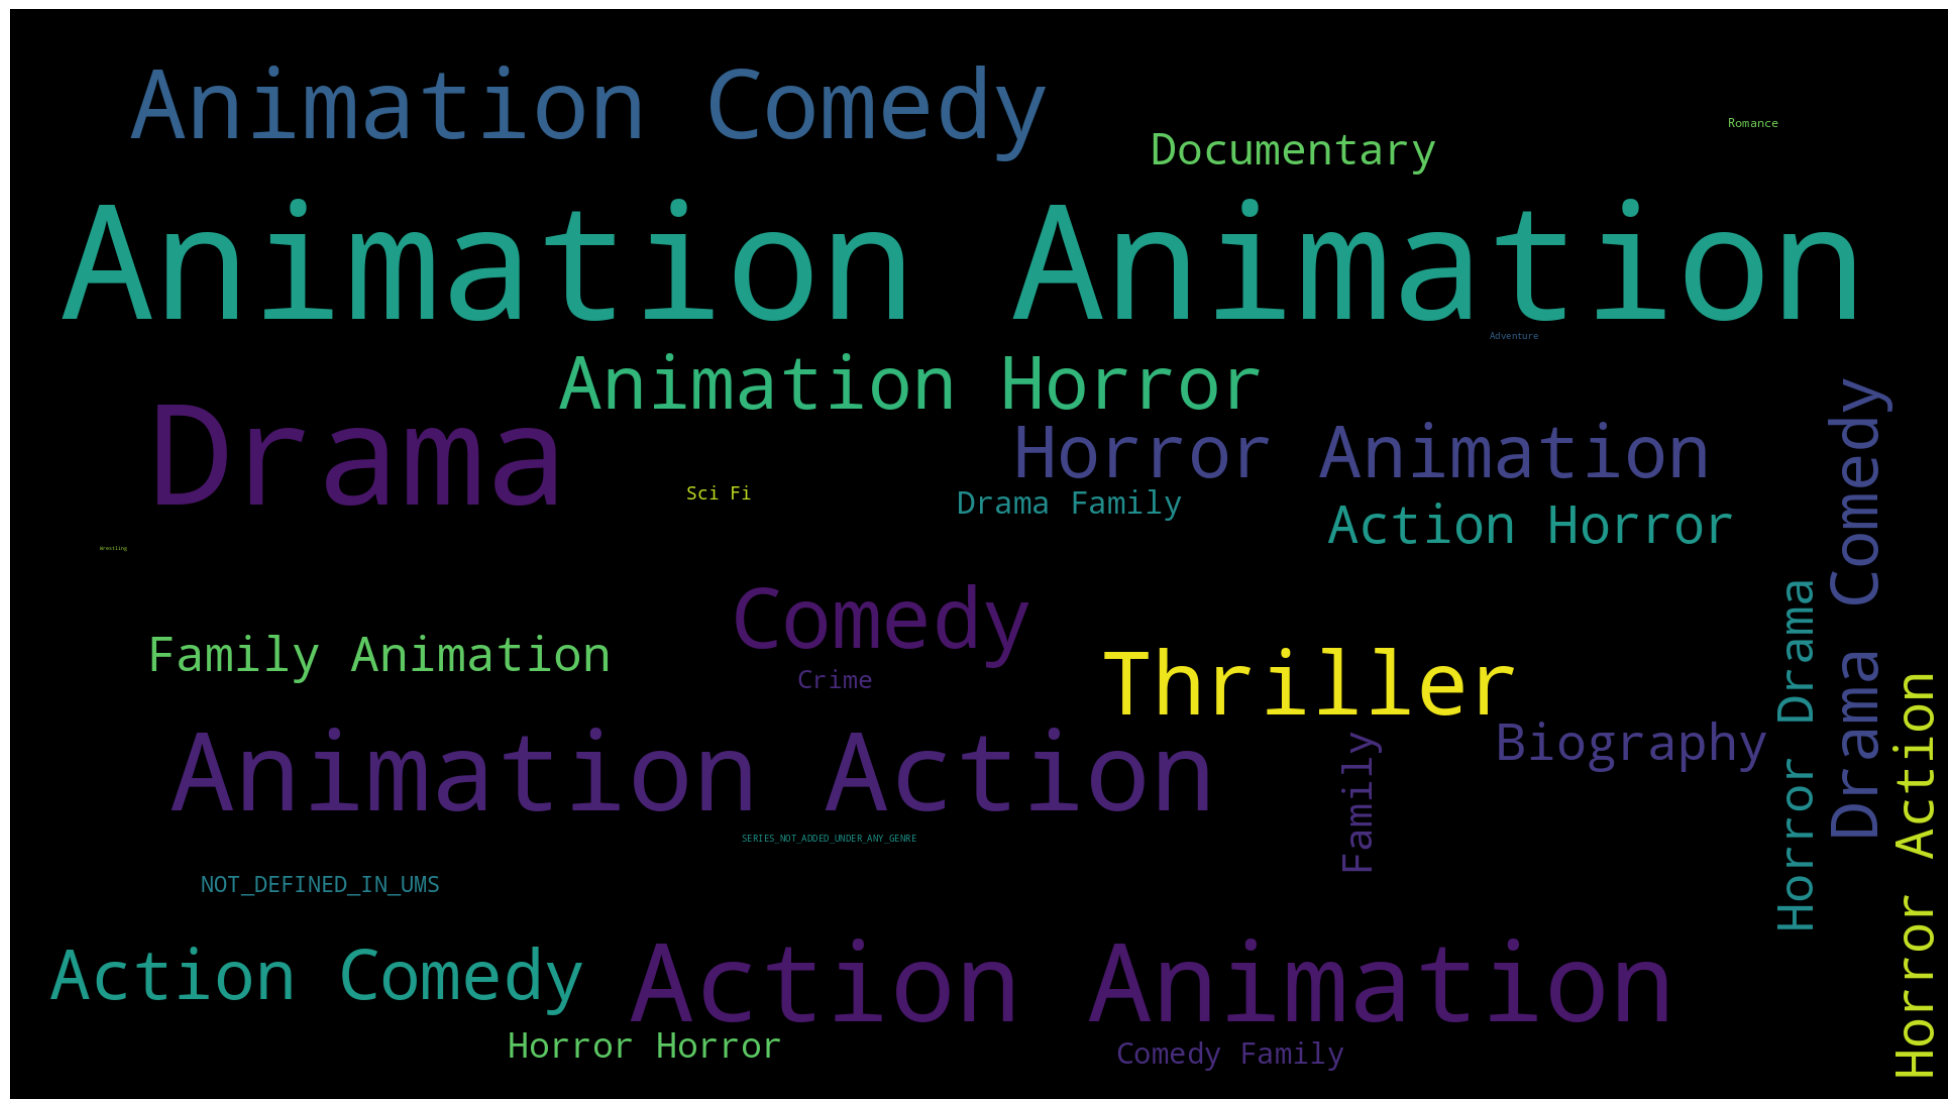

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.program_genre))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('Genere.png')
plt.show()

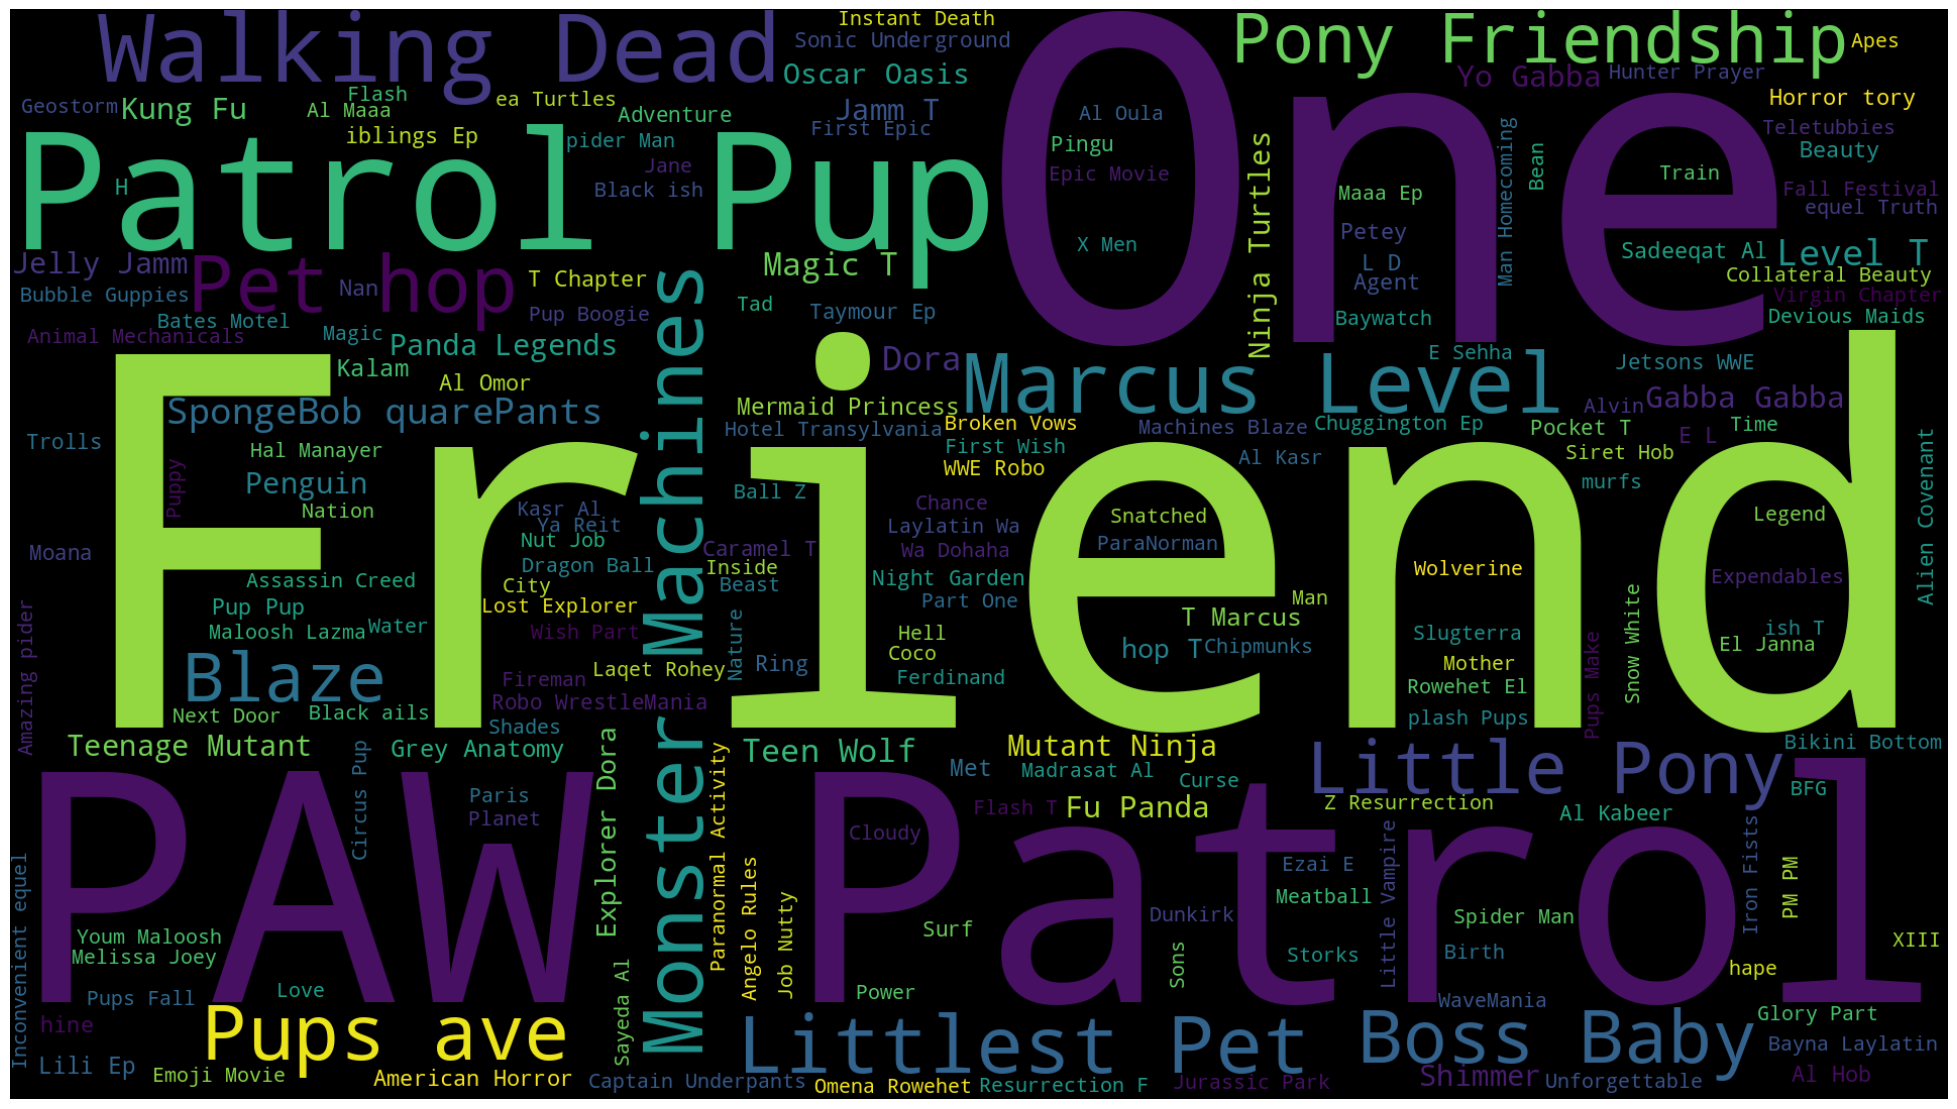

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.program_name))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('Genere.png')
plt.show()

####This pic show that friends is the most frequent word!!

#HD vs SD

In [ ]:
dataset['hd'].value_counts()

0    626026
1    320166
Name: hd, dtype: int64

In [ ]:
dataset['hd'] = np.where(dataset['hd'] == 0, 'SD', dataset['hd'])

In [ ]:
dataset['hd'] = np.where(dataset['hd'] != 'SD' , 'HD', dataset['hd'])

In [ ]:
dataset['hd']

0          SD
1          HD
2          HD
3          HD
4          HD
           ..
1048570    SD
1048571    SD
1048572    SD
1048573    HD
1048574    HD
Name: hd, Length: 946192, dtype: object

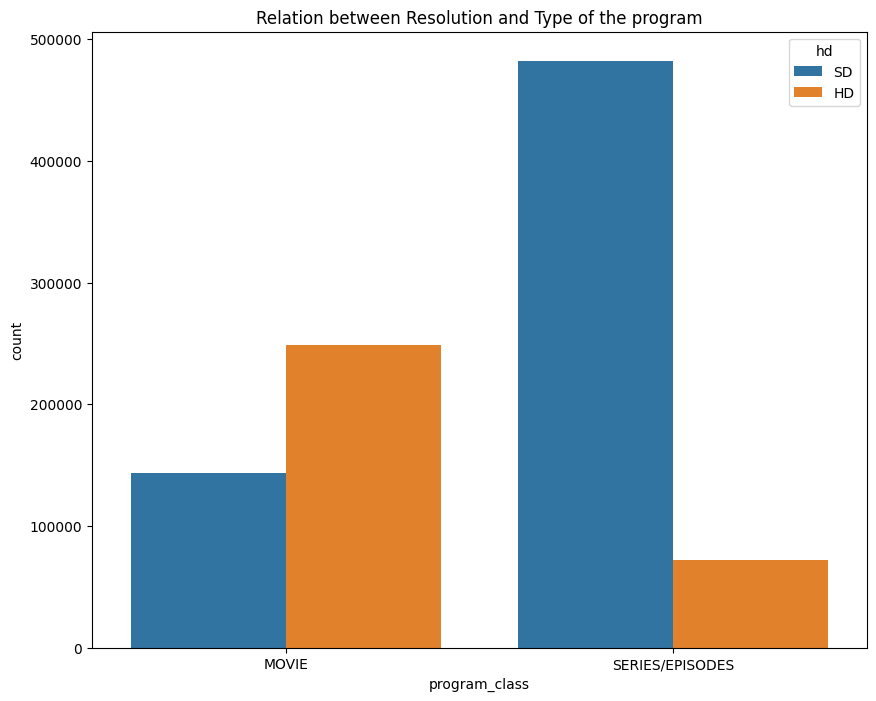

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='program_class',hue='hd',data=dataset)
plt.title('Relation between Resolution and Type of the program')
plt.show()

###This show that most of HD programs are Movies

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-ut

In [ ]:
!jupyter nbconvert --to PDF "/content/gdrive/MyDrive/STC_TV_Analysis.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/STC_TV_Analysis.ipynb to PDF
[NbConvertApp] Support files will be in STC_TV_Analysis_files/
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Making directory ./STC_TV_Analysis_files
[NbConvertApp] Writing 112234 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1217500 bytes to /content/gdr